# Prediction Housing Price using Artificial Neural Network 

In [1]:
from IPython.display import Image
import os
!ls ../input/ann-neural-net

ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png


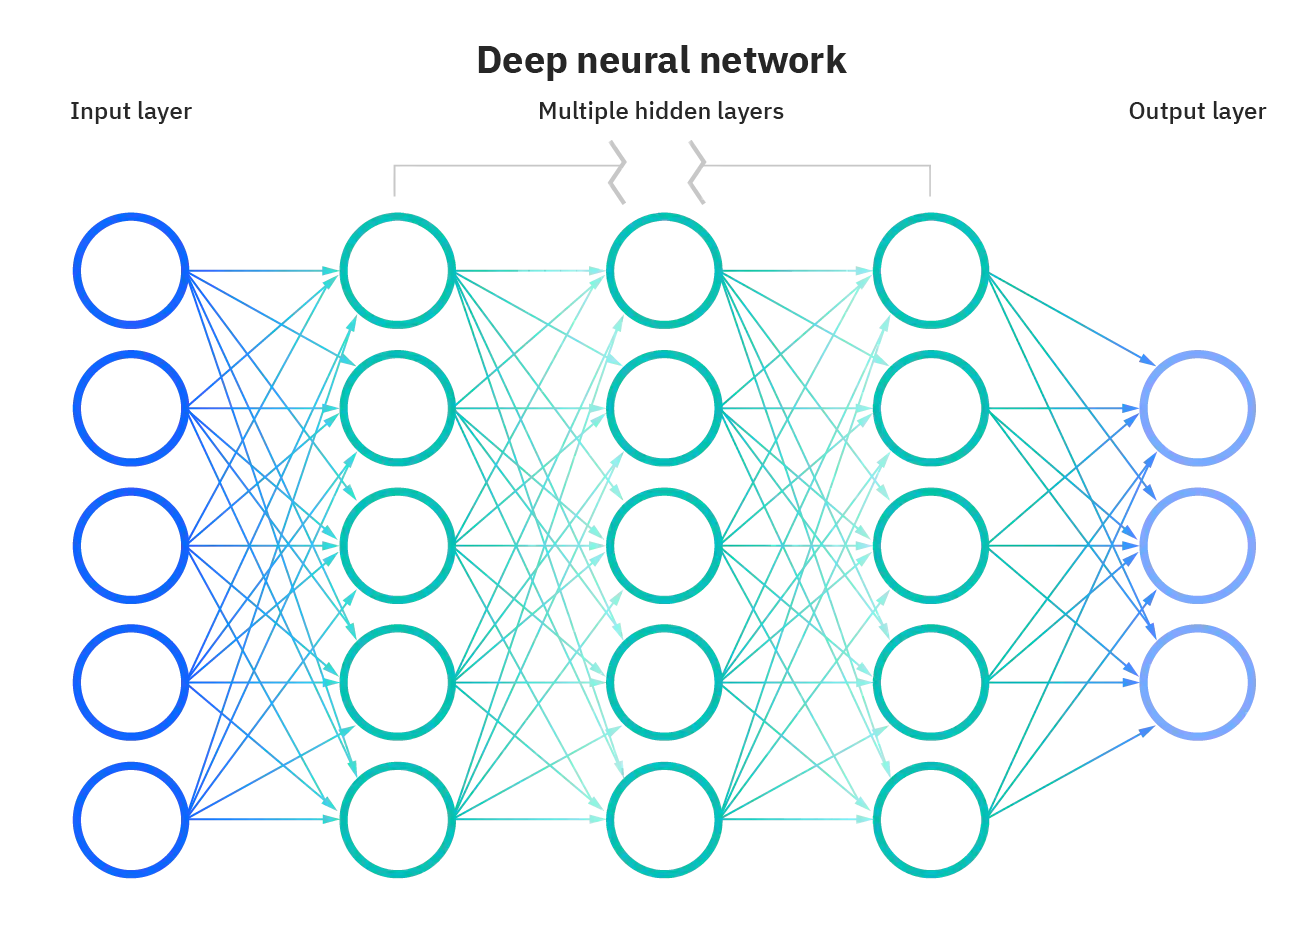

In [2]:
Image("/kaggle/input/ann-neural-net/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png")

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#1. Import Libraries And Load Data">1. Import Libraries And Load Data</a></li>
        <li><a href="https://#Visualization And Exploratory Data ">Visualization And Exploratory Data </a></li>
        <li><a href="https://#Prepare Before Building The Model">Prepare Before Building The Model</a></li> 
        <li><a href="https://#Building Artificial Neural NetWorks">Building Artificial NeuralNetWorks</a></li> 
        <li><a href="https://#Model Evaluation">Model Evaluation</a></li> 
    </ol>
</div>
<br>
<hr>

<h2 id="1. Import Libraries And Load Data">1. Import Libraries And Load Data</h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Load Data**

In [4]:
house_data=pd.read_csv("/kaggle/input/kc-house/kc_house_data.csv")

In [5]:
house_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Check Null Value**

In [7]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- In the data file there is no null value

**Descriptive Statictics**

In [8]:
house_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<h2 id="2. Visualization And Exploratory Data">2. Visualization And Exploratory Data</h2>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

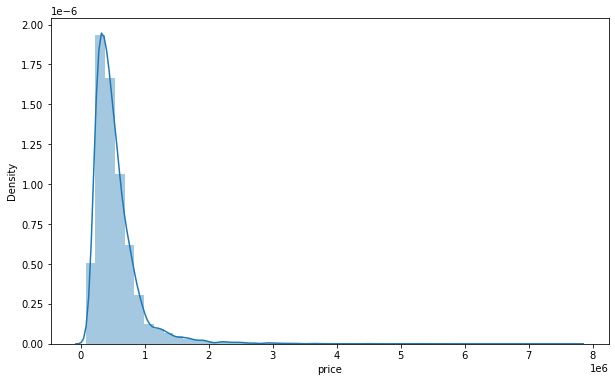

In [9]:
# House price distribution chart, most house prices are concentrated from 0-1 million dong
# And there are some extreme exceptional houses with really expensive prices
# As seen there are not too many houses with a price greater than 3 million
# So we can build house price predictions from 0-2 million
plt.figure(figsize=(10,6))
sns.distplot(house_data['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

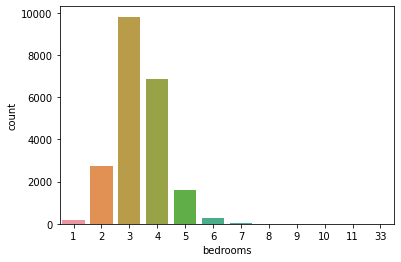

In [10]:
# We proceed to classify by bedroom
# As seen the vast majority of houses have between 2-5 bedrooms
# There are a handful of houses that have between 6-33 rooms
sns.countplot(house_data['bedrooms'])

<AxesSubplot:>

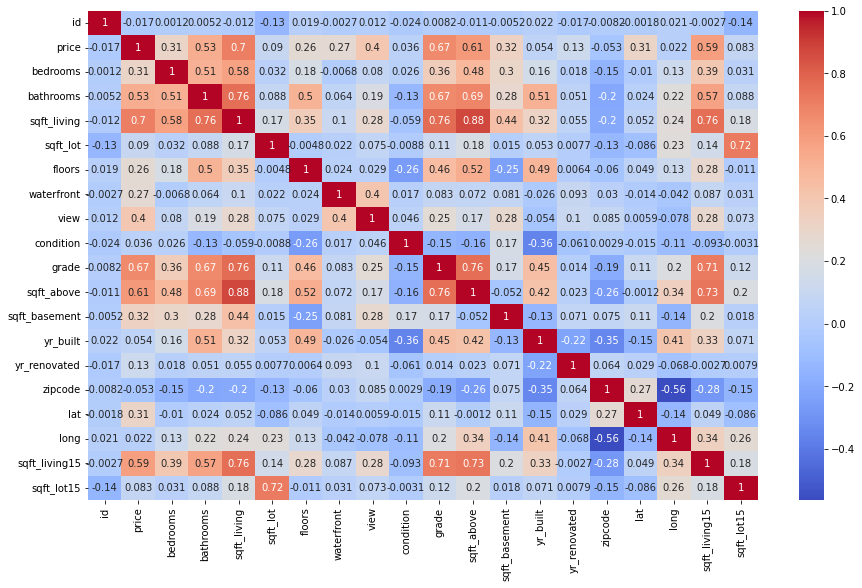

In [11]:
#Correlation of properties by house price ["price'']
plt.figure(figsize=(15,9))
house_data_2=house_data.corr()
sns.heatmap(data=house_data_2,annot=True,cmap='coolwarm')

In [12]:
# Find the correlation of variables with the variable price
house_data.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

- As we have seen the living space greatly affects the price

**I plot scatter plot between living space and price** 

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

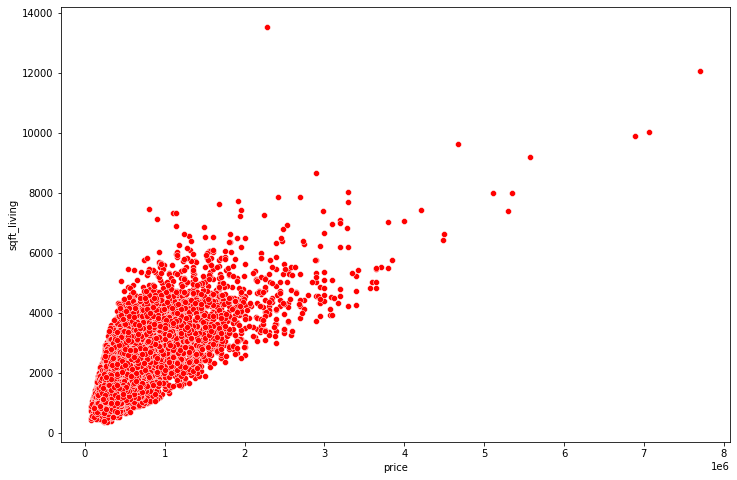

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=house_data,color='red')

**Continue for bedrooms and prices**

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

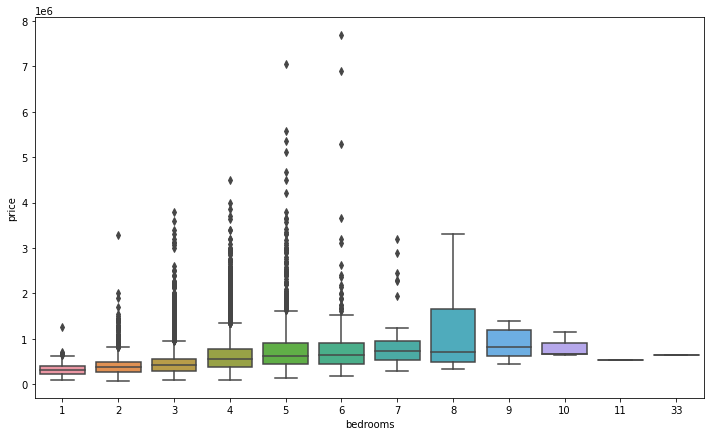

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='bedrooms',y='price',data=house_data)

**We examine the change of price by latitude, by location**

<AxesSubplot:xlabel='price', ylabel='lat'>

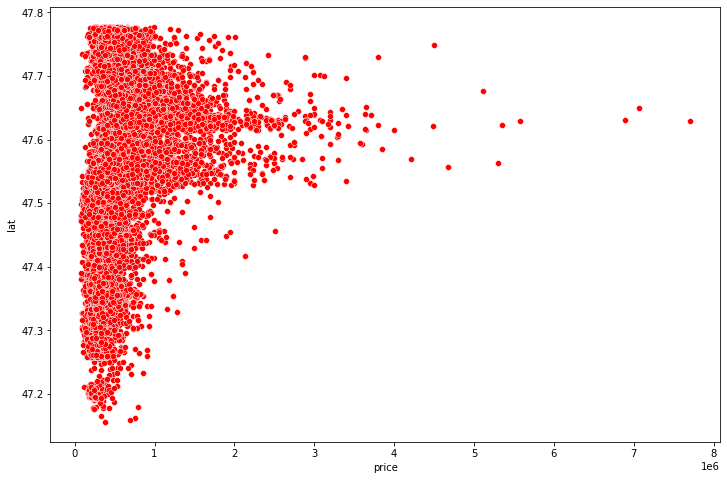

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=house_data,color='red')

- We find that the trend is distributed along a certain longitude

<AxesSubplot:xlabel='long', ylabel='lat'>

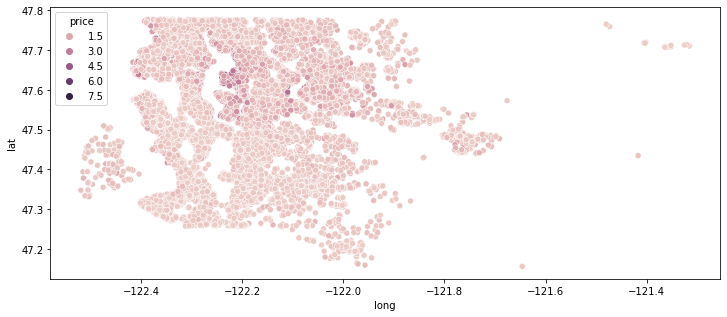

In [16]:
# We find some hot spots on the map
# And sort prices by their color
# Hue is the attribute I want the graph to represent,
# Here I show them by price
plt.figure(figsize=(12,5))
sns.scatterplot(x='long',y='lat',data=house_data,hue='price')

**Check out the top 20 most expensive houses**

In [17]:
house_data.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [18]:
# Find the number of houses in the highest 1% and sort
len(house_data)*0.01

215.97

In [19]:
# Take out 1% of that house and stack it
non_top_1_perc=house_data.sort_values("price",ascending=False).iloc[216:]

In [20]:
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='long', ylabel='lat'>

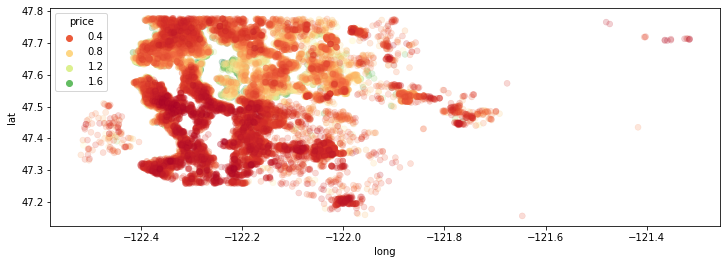

In [21]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,
               hue='price',edgecolor=None,
               alpha=0.2,palette='RdYlGn')

- We find that having a house on the edge will and
- Near the river will have a higher price, riverside real estate

<h2 id="3. Prepare Before Building The Model">3. Prepare Before Building The Model</h2>

**We try to check the price of riverside houses**

In [22]:
house_data=house_data.drop('id',axis=1)

In [23]:
house_data['date']=pd.to_datetime(house_data['date'])

In [24]:
house_data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [25]:
def year_extraction(date):
    return date.year

In [26]:
house_data['year']=house_data['date'].apply(lambda date:date.year)
house_data['month']=house_data['date'].apply(lambda date:date.month)

In [27]:
# let's see any number of changes
# based on the month the product sold or not
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

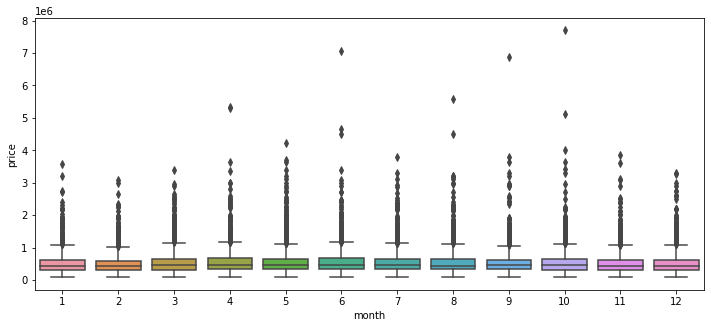

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(x='month',y='price',data=house_data)

<AxesSubplot:xlabel='month'>

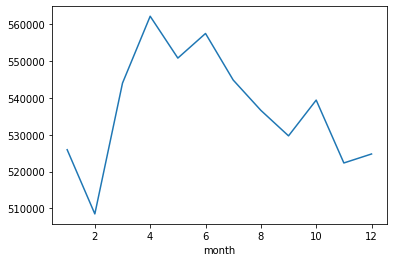

In [29]:
# We check the change of selling price within a month
# We see no significant change
house_data.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

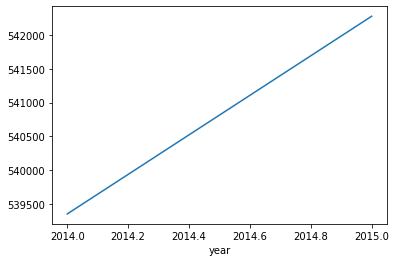

In [30]:
# Changes in house sales prices year by year, selling prices always increase
house_data.groupby('year').mean()['price'].plot()

In [31]:
house_data=house_data.drop('date',axis=1)

In [32]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [33]:
# We notice that there is a single categorical variable, zip code
house_data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [34]:
house_data=house_data.drop('zipcode',axis=1)

In [35]:
# Check if the houses are renovated
house_data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [36]:
# Check square and basement values
house_data['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

<h2 id="4. Building Artificial NeuralNetWorks">4. Building Artificial NeuralNetWorks</h2>

**Train Model**

In [37]:
X=house_data.drop('price',axis=1)
y=house_data['price'].values

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler()

In [41]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [43]:
X_train.shape

(15117, 19)

In [44]:
model=Sequential()

2023-01-23 00:14:36.381091: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [45]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [46]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=128,epochs=200)

2023-01-23 00:14:36.655857: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
119/119 [==============================] - 1s 4ms/step - loss: 424505835520.0000 - val_loss: 432229842944.0000
Epoch 2/200
119/119 [==============================] - 0s 4ms/step - loss: 423018266624.0000 - val_loss: 427268931584.0000
Epoch 3/200
119/119 [==============================] - 0s 3ms/step - loss: 404340899840.0000 - val_loss: 385848672256.0000
Epoch 4/200
119/119 [==============================] - 0s 3ms/step - loss: 318680924160.0000 - val_loss: 252378857472.0000
Epoch 5/200
119/119 [==============================] - 0s 4ms/step - loss: 165252202496.0000 - val_loss: 123042095104.0000
Epoch 6/200
119/119 [==============================] - 0s 3ms/step - loss: 98492727296.0000 - val_loss: 109286547456.0000
Epoch 7/200
119/119 [==============================] - 0s 3ms/step - loss: 93828612096.0000 - val_loss: 107467530240.0000
Epoch 8/200
119/119 [==============================] - 0s 4ms/step - loss: 92123570176.0000 - val_loss: 105655263232.0000
Epoch 9/200
119/119

### Evalution Model

In [47]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

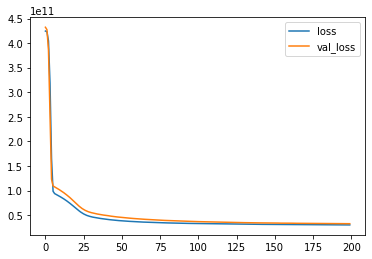

In [48]:
losses.plot()

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [50]:
predictions=model.predict(X_test)

In [51]:
# Mean Squared Error 
mean_squared_error(y_test,predictions)

32522318138.298553

In [52]:
# Mean Absolute Error 
mean_absolute_error(y_test,predictions)

106895.12542679398

In [53]:
house_data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

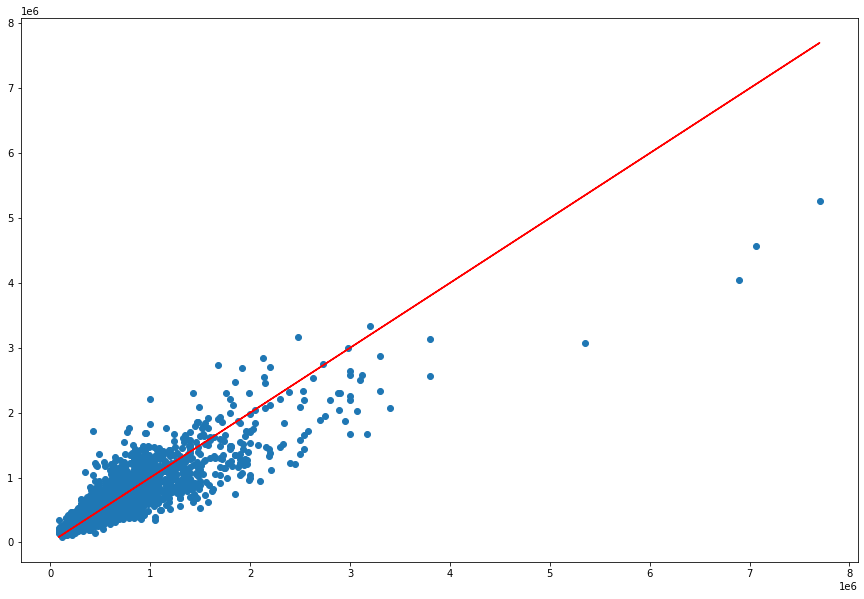

In [54]:
# Score of variance 1.0 is a good score
# It indicates how much variance is explained by the model
# Your actual picture
plt.figure(figsize=(15,10))
plt.scatter(y_test,predictions)
# Compare test y by red line
plt.plot(y_test,y_test,'r')

In [55]:
single_house=house_data.drop('price',axis=1).iloc[0]


In [56]:
single_house=scaler.transform(single_house.values.reshape(-1,19))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [57]:
model.predict(single_house)

array([[286870.03]], dtype=float32)

In [58]:
house_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
